<a href="https://colab.research.google.com/github/Muhammad-Ahtasham/Learnings/blob/master/Deep_Learning_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
data = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
(x_train, y_train), (x_test, y_test) = data

In [ ]:
len(x_train)

60000

In [ ]:
x_train.shape

(60000, 28, 28)

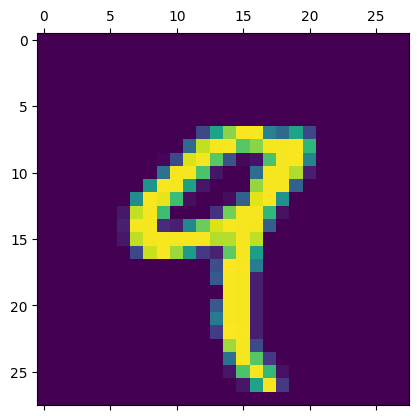

In [ ]:
plt.matshow(x_train[4])

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1877 - accuracy: 0.5837
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.9768 - accuracy: 0.7131
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7902 - accuracy: 0.7381
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6264 - accuracy: 0.7603
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4836 - accuracy: 0.7762


In [ ]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4039 - accuracy: 0.8002


[1.403942346572876, 0.8001999855041504]

In [ ]:
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 3ms/step


array([0.31576326, 0.40045634, 0.35255006, 0.41312802, 0.47392106,
       0.37950113, 0.29317486, 0.8099544 , 0.37443152, 0.5799091 ],
      dtype=float32)

In [ ]:
np.argmax(y_predicted[0])

7

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
cm = tf.math.confusion_matrix (labels = y_test, predictions= y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 922,    2,    4,    8,    0,    3,   35,    1,    5,    0],
       [   0, 1109,    7,    4,    0,    0,    4,    0,   11,    0],
       [  19,   85,  780,   34,   13,    0,   39,   22,   39,    1],
       [   6,   50,   27,  863,    0,    2,    6,   24,   24,    8],
       [   1,   50,    2,    0,  780,    0,   33,   10,    4,  102],
       [  37,  113,    4,  207,   30,  371,   29,   45,   29,   27],
       [  26,   48,    6,    0,   12,    6,  859,    0,    1,    0],
       [   2,   69,   12,    2,    8,    0,    4,  904,    7,   20],
       [  22,   94,    9,   98,   12,    3,   19,   27,  668,   22],
       [  23,   43,    5,   11,   71,    0,    1,  101,    8,  746]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

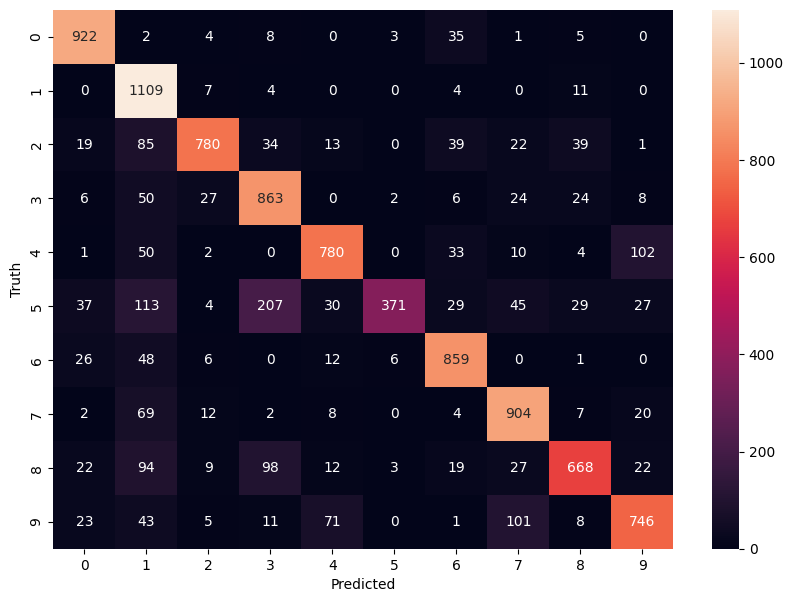

In [ ]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Adding hidden layer

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid'),
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 1.2168 - accuracy: 0.7256
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5055 - accuracy: 0.8704
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3928 - accuracy: 0.8927
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3488 - accuracy: 0.9025
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3240 - accuracy: 0.9074


In [ ]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3043 - accuracy: 0.9126


[0.3042890429496765, 0.9125999808311462]

Flatten in Sequential Model

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid'),
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 1.2119 - accuracy: 0.7175
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5039 - accuracy: 0.8704
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3912 - accuracy: 0.8931
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3458 - accuracy: 0.9032
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3198 - accuracy: 0.9088


### Why Needing Activation Function


If we remove activation function, the y predicted is simply a linear function. if so, we dont need hidden layers (because they are useless)
Activation Function, add non linearity in the equation

Gradient Decent Uses the whole dataset to adjust the weights
while stochestic gd uses a randomly picked sample of the dataset to update the weights
